<a href="https://colab.research.google.com/github/brunacmendes/book-recommender-project/blob/main/1_data_preparation_AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Book Reviews: Analyzing & Cleaning the dataset

## About the data

These dataset includes only (item, user, rating, timestamp) tuples.

Ratings are expressed on a scale from 0-5 (higher values denoting higher appreciation)


## Reading the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

datapath = 'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Books.csv'
r_cols = ['book_id', 'user_id', 'rating','timestamp']
ratings = pd.read_csv(datapath, names=r_cols)

In [2]:
ratings.head()

,book_id,user_id,rating,timestamp
0,0001713353,A1C6M8LCIX4M6M,5.0,1123804800
1,0001713353,A1REUF3A1YCPHM,5.0,1112140800
2,0001713353,A1YRBRK2XM5D5,5.0,1081036800
3,0001713353,A1V8ZR5P78P4ZU,5.0,1077321600
4,0001713353,A2ZB06582NXCIV,5.0,1475452800


In [3]:
ratings.dtypes

book_id       object
user_id       object
rating       float64
timestamp      int64
dtype: object

In [4]:
#tamanho do dataset
ratings.shape

(51311621, 4)

## Pre-processing

In [5]:
#quantos valores nulos tem no dataset
ratings.isnull().sum()

book_id      0
user_id      0
rating       0
timestamp    0
dtype: int64

In [6]:
#rating distribution
ratings['rating'].value_counts()

5.0    33979736
4.0     9557650
3.0     3835225
1.0     2088314
2.0     1850688
0.0           8
Name: rating, dtype: int64

In [10]:
#elimina as ratings de nota 0
ratings=ratings.loc[ratings['rating']>0]

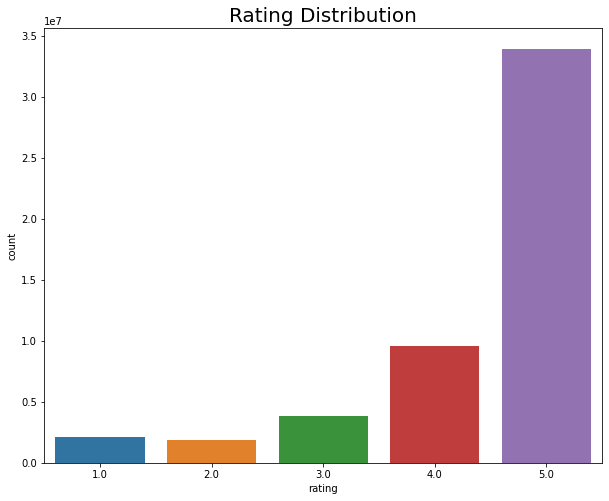

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=ratings)
plt.title('Rating Distribution',size=20)
plt.show()

In [12]:
#descarta coluna timestamp

ratings.drop(['timestamp'],axis=1,inplace=True)

In [13]:
#salva dataset

ratings.to_csv(r'amazon_ratings.csv',index=False,sep=',')